/var/folders/9c/k2rvfmz92ld8z0rgrcsbrnl40000gn/T/ipykernel_7733/3408672877.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap=plt.cm.get_cmap('tab10', 10))


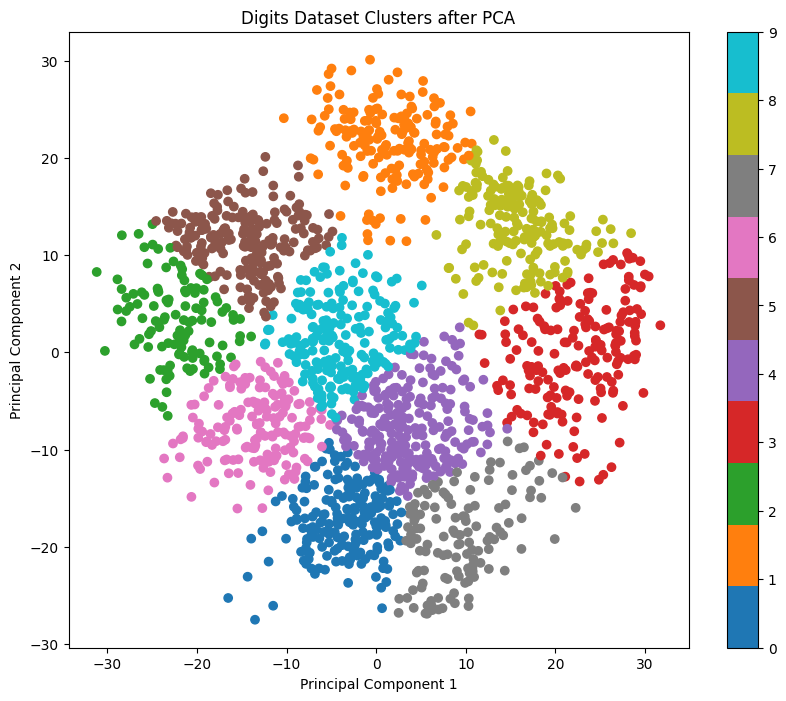

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

# Load the digits dataset
digits = load_digits()

# Extract the data and labels
X = digits.data
y = digits.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=10,init='k-means++')  # 10 clusters for 10 digits
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar(ticks=range(10))
plt.title('Digits Dataset Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [15]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, y_kmeans)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.39575327653922143


In [16]:
from sklearn.metrics import homogeneity_score

# Calculate homogeneity score
homogeneity = homogeneity_score(y, y_kmeans)
print("Homogeneity Score:", homogeneity)


Homogeneity Score: 0.533873365358947


/var/folders/9c/k2rvfmz92ld8z0rgrcsbrnl40000gn/T/ipykernel_7733/3304040150.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap=plt.cm.get_cmap('tab10', 10))


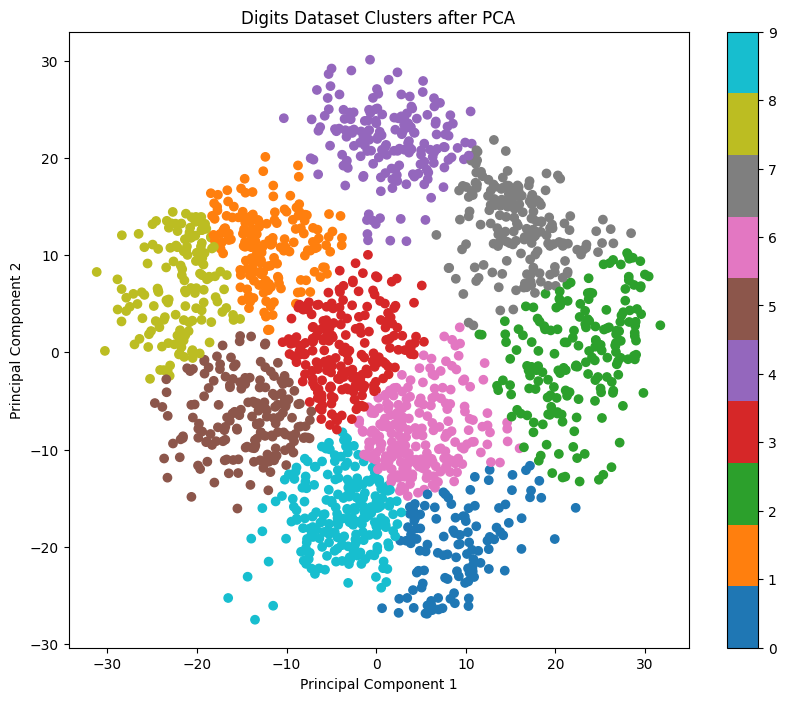

In [19]:
#cross validation 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score

# Load the digits dataset
digits = load_digits()

# Extract the data and labels
X = digits.data
y = digits.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define the number of clusters
n_clusters = 10

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store silhouette scores for each fold
silhouette_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X_pca[train_index], X_pca[test_index]

    # Fit K-means clustering on training data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)

    # Predict clusters on test data
    y_test_pred = kmeans.predict(X_test)

    # Calculate silhouette score for the current fold
    silhouette_avg = silhouette_score(X_test, y_test_pred)

    # Store the silhouette score
    silhouette_scores.append(silhouette_avg)

# Calculate and print the average silhouette score across all folds
avg_silhouette_score = np.mean(silhouette_scores)
print("Average Silhouette Score:", avg_silhouette_score)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap=plt.cm.get_cmap('tab10', 10))

plt.colorbar(ticks=range(n_clusters))
plt.title('Digits Dataset Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
